## Random Sample Imputation

In [1]:
# Aim: Random Sample iputation consists of taking random obseration
# fron the dataset and we use theis observations to replace the nan values
# This impuation assumes that missing values are missing completely at random

In [2]:
import pandas as pd
df = pd.read_csv('titanic-train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

491    21.0
Name: Age, dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # it will have random samples to fill na values
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    # pandas should have same index inorder to merge dataset
    random_sample_value.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample_value

In [14]:
median = df.Age.median()

In [19]:
impute_nan(df,'Age',median)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

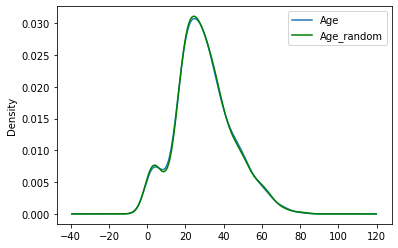

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' ,ax = ax)
df.Age_random.plot(kind = 'kde', ax = ax, color = 'green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

In [ ]:
### Advantages
